In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from scipy.stats.mstats import zscore #to standardize regression coefficients
import matplotlib.pyplot as plt #to plot

In [4]:

team_data = "team-picking-categories.csv"
team_df = pd.read_csv(team_data)

team_df

,TEAM,BMK,UNI,CCH,STX,SMK,AFF,SLP,NYP,FRL,BNG,TRD,BWG,FUT,PLA,OWN,BEH
0,Green Bay Packers,0,94,81,100,100,94,84,52,100,81,100,6,77,97,100,69
1,Pittsburgh Steelers,32,100,65,58,68,74,68,77,84,42,90,29,81,84,97,69
2,Kansas City Chiefs,26,71,84,84,74,71,97,35,71,48,45,77,94,71,87,44
3,New England Patriots,68,68,100,68,32,26,23,90,90,84,81,0,87,94,65,77
4,Buffalo Bills,3,81,58,32,97,97,55,81,55,61,48,74,68,58,77,69
5,Carolina Panthers,35,16,52,61,65,84,61,68,74,90,6,52,90,77,74,44
6,Seattle Seahawks,58,35,95,90,42,23,6,13,97,100,35,26,100,100,94,29
7,Indianapolis Colts,19,74,68,97,81,77,100,61,94,94,71,23,26,87,48,16
8,Arizona Cardinals,65,6,95,87,35,90,16,16,77,68,29,42,84,81,71,56
9,Baltimore Ravens,39,29,90,81,61,81,45,87,68,74,26,19,42,90,90,6


In [10]:
ticket_data = "NFL_TicketSalesFinal.csv"
ticket_df = pd.read_csv(ticket_data)

ticket_df

,TEAM,Ticket Sales
0,Dallas Cowboys,950
1,New England Patriots,600
2,New York Giants,519
3,Houston Texans,497
4,Washington Redskins,493
5,San Francisco 49ers,492
6,Philadelphia Eagles,482
7,New York Jets,475
8,Atlanta Falcons,458
9,Green Bay Packers,456


In [11]:
combined_df = pd.merge(ticket_df, team_df, how='left')
combined_df

,TEAM,Ticket Sales,BMK,UNI,CCH,STX,SMK,AFF,SLP,NYP,FRL,BNG,TRD,BWG,FUT,PLA,OWN,BEH
0,Dallas Cowboys,950,90,84,42,77,10,16,65,26,45,77,87,32,29,61,52,29
1,New England Patriots,600,68,68,100,68,32,26,23,90,90,84,81,0,87,94,65,77
2,New York Giants,519,100,65,77,42,0,13,29,100,48,23,97,58,39,48,84,10
3,Houston Texans,497,87,32,55,71,13,48,52,23,81,35,0,39,61,74,68,95
4,Washington Redskins,493,84,26,3,10,16,0,48,84,0,6,74,84,55,3,16,3
5,San Francisco 49ers,492,48,61,0,39,52,10,3,3,3,65,84,3,10,26,6,95
6,Philadelphia Eagles,482,81,77,71,52,19,29,35,94,52,26,55,55,45,55,39,95
7,New York Jets,475,71,58,23,23,29,3,29,100,16,10,19,68,52,13,23,16
8,Atlanta Falcons,458,74,13,48,48,26,61,74,55,58,55,10,35,48,42,58,56
9,Green Bay Packers,456,0,94,81,100,100,94,84,52,100,81,100,6,77,97,100,69


In [14]:
X = combined_df[["BMK", "UNI","CCH","STX","SMK","AFF","SLP","NYP","FRL","BNG","TRD","BWG","FUT","PLA","OWN","BEH"]]
y = combined_df["Ticket Sales"]
X_std = pd.DataFrame(data=zscore(X),
                     columns=["BMK", "UNI","CCH","STX","SMK","AFF","SLP","NYP","FRL","BNG","TRD","BWG","FUT","PLA","OWN","BEH"])

In [15]:
#Split data into training and testing
## set desired size (%) of the training subsample
trainPerc = 0.8

X_train, X_test, y_train,y_test = train_test_split(X_std, y, train_size = trainPerc)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(25, 16) (25,)
(7, 16) (7,)


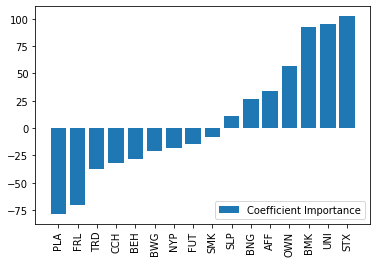

-3.918941220505121

In [16]:
#lasso
fig, ax = plt.subplots()
# Run a loose or tight lasso, alpha = 0.001 to alpha=0.1
modellasso=Lasso().set_params(alpha = 0.009).fit(X_train,y_train)
#Adjusting labels according to coefficient order for plotting purposes
labels = ["BMK", "UNI","CCH","STX","SMK","AFF","SLP","NYP","FRL","BNG","TRD","BWG","FUT","PLA","OWN","BEH"]
l = np.array([range(len(modellasso.coef_)),modellasso.coef_]).transpose()
l = l[l[:,1].argsort()]
l1 = [int(k) for k in l[:,0]]
labels = [labels[k] for k in l1]
coefs = [modellasso.coef_[k] for k in l1]
plt.xticks(range(len(modellasso.coef_)), labels, rotation='vertical')
p1=plt.bar(range(len(modellasso.coef_)),coefs, label = 'Coefficient Importance')
plt.legend(loc=4)
plt.show()
modellasso.score(X_test,y_test)